In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
dir= r'C:\Users\snjts\Image classification'

In [3]:
categories= ['cats', 'dogs']

In [4]:
data= []

In [5]:
for category in categories:
    path=os.path.join(dir, category)
    label= categories.index(category)
    
    for img in os.listdir(path):
        imgpath= os.path.join(path, img)
        pet_img= cv2.imread(imgpath, 0)
        #cv2.imshow('image', pet_img)
        pet_img= cv2.resize(pet_img, (50,50))    
        image= np.array(pet_img).flatten()
        data.append([image, label])

In [6]:
print(len(data))

8000


In [7]:
import pickle

In [8]:
pick_in= open('data1.pickle', 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [9]:
pick_in= open('data1.pickle', 'rb')
data= pickle.load(pick_in)
pick_in.close()

In [10]:
import random

In [11]:
random.shuffle(data)
features= []
labels= []

In [12]:
for feature, label in data:
    features.append(feature)
    labels.append(label)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest= train_test_split(features, labels, test_size= 0.25)

In [15]:
from sklearn.svm import SVC

In [16]:
model= SVC(C=1, kernel='poly', gamma= 'auto')

In [17]:
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [18]:
pick= open('model.sav', 'wb')
pickle.dump(model, pick)
pick.close()

In [19]:
prediction= model.predict(xtest)

In [20]:
accuracy= model.score(xtest, ytest)

In [21]:
categories= ['cats', 'dogs']

In [22]:
print('Accuracy:', accuracy)
print('Prediction is:', categories[prediction[0]])

Accuracy: 0.5805
Prediction is: cats


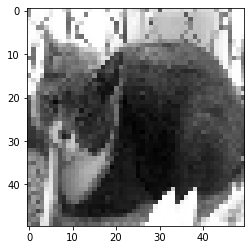

In [30]:
my_pet= xtest[0].reshape(50,50)
plt.imshow(my_pet, cmap= 'gray')
plt.show()